In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

Python: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.14.2
matplotlib: 2.1.2
pandas: 0.20.3


Attribute Information:

Listing of attributes: 

>50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- __sex__: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- __hours-per-week__: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Study the relationship between 'sex' and 'hours-per-week' worked variables

- First let's get the assumptions :

> - There must be different participants in each group with no participant being in more than one group. In our case, each individual can only have one 'sex' and can not be in multiple workhour categories.
> - Random samples from the population. In our case, the census is a good representation of the population.

In [3]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\census.csv"

In [4]:
cols = ['age', 'workclass', 'fnlwg', 'education', 'education-num', 
        'marital-status','occupation','relationship', 'race','sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [5]:
data = pd.read_csv(location, names=cols)

In [6]:
data.head(3)

,age,workclass,fnlwg,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [7]:
# Create a column for work hour categories.
def process_hours(df):
    cut_points  = [ 0,    9,     19,     29,     39,     49, 1000]
    label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
    
    df["hours_per_week_categories"] = pd.cut(df["hours-per-week"],
                                             cut_points,
                                             labels=label_names)
    return df

In [8]:
data = process_hours(data)

In [9]:
workhour_by_sex = data[['sex', 'hours_per_week_categories']]
workhour_by_sex.head()

,sex,hours_per_week_categories
0,Male,40-49
1,Male,10-19
2,Male,40-49
3,Male,40-49
4,Female,40-49


In [10]:
workhour_by_sex['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [11]:
workhour_by_sex['hours_per_week_categories'].value_counts()

40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

#### The Null and Alternate Hypotheses
we are interested in knowing if there is a relationship between 'sex' and 'hours_per_week_categories'. 

In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

> - $H_0$: There is no statistically significant relationship between sex and the # of hours per week worked.
> - $H_a$: There is a statistically significant relationship between sex and the # of hours per week worked.

#### Constructing the Contingency Table

The next step is to format the data into a frequency count table. This is called a Contingency Table, we can accomplish this by using the pd.crosstab() function in pandas.

In [12]:
contingency_table = pd.crosstab(
    workhour_by_sex['sex'],
    workhour_by_sex['hours_per_week_categories'],
    margins = True
)

contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,458,1246,2392,3667,18336,6462,32561


- Each cell in this table represents a frequency count. For example, the intersection of the 'Male' row and the '10-19' column of the table would represent the number of males who works 10-19 hours per week from our sample data set. 
- The intersection of the 'All' row and the '50+' column would represent the total number of people who works 50+ hours a week.

#### Visualizing the Contingency Table with a Stacked Bar Chart

Text(0,0.5,'Count')

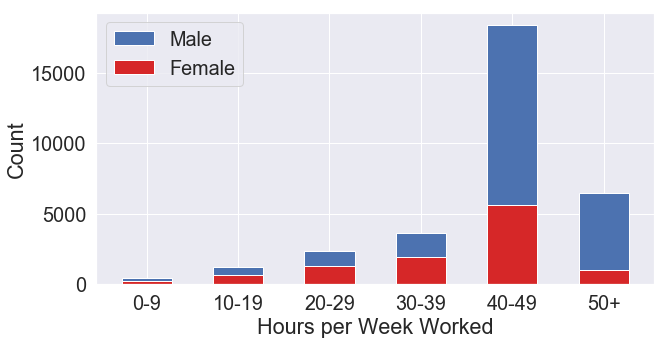

In [13]:
#Assigns the frequency values
malecount   = contingency_table.iloc[0][0:6].values
femalecount = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)

categories = ["0-9","10-19","20-29","30-39","40-49","50+"]

p1 = plt.bar(categories, malecount, 0.55, color='#d62728')
p2 = plt.bar(categories, femalecount, 0.55, bottom=malecount)

plt.legend((p2[0], p1[0]), ('Male', 'Female'))

plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')

- If there is truly no relationship between sex and the number of hours per week worked, then the data would show an __even ratio split__ between 'Male' and 'Female' for each time category. 

- For example, if 5% of the females worked 50+ hours, we would expect the same percentage for males who worked 50+ hours.

#### Method 1 : Chi-Squared Test for Independence - Calculation with Numpy

- In order to determine whether we accept or reject the null hypothesis, we have to compute p-value

- For testing with two categorical variables, we will use the Chi-squared test.

$$ X^2 = \frac{(observed−expected)^2}{expected}$$

- Where $X^2$ is the test statistic, 
- __observed__ are values we have in the contingency table, 
- __expected__ are values we would expect assuming the null hypothesis is true

In [14]:
f_obs = np.append(contingency_table.iloc[0][0:6].values, contingency_table.iloc[1][0:6].values)
f_obs

array([  235,   671,  1287,  1914,  5636,  1028,   223,   575,  1105,
        1753, 12700,  5434], dtype=int64)

In [15]:
row_sums = contingency_table.iloc[0:2,6].values
row_sums

array([10771, 21790], dtype=int64)

In [16]:
col_sums = contingency_table.iloc[2,0:6].values
col_sums

array([  458,  1246,  2392,  3667, 18336,  6462], dtype=int64)

In [17]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
        
f_expected

[151.50388501581648,
 412.1699579251252,
 791.2604649734345,
 1213.0234636528362,
 6065.44811277295,
 2137.5941156598383,
 306.4961149841835,
 833.8300420748749,
 1600.7395350265656,
 2453.976536347164,
 12270.551887227051,
 4324.405884340162]

In [19]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()

print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 2287.190943926107


#### Degrees of Freedom
- calculate the degrees of freedom before we can determine the p-value.

- DoF = (Number of rows−1)∗(Number of columns−1)

In [20]:
dof = (len(row_sums)-1)*(len(col_sums)-1)

print("Degrees of Freedom: {}".format(dof))


Degrees of Freedom: 5


#### Upper-tail critical values of chi-square distribution with ν degrees of freedom

https://www.medcalc.org/manual/chi-square-table.php

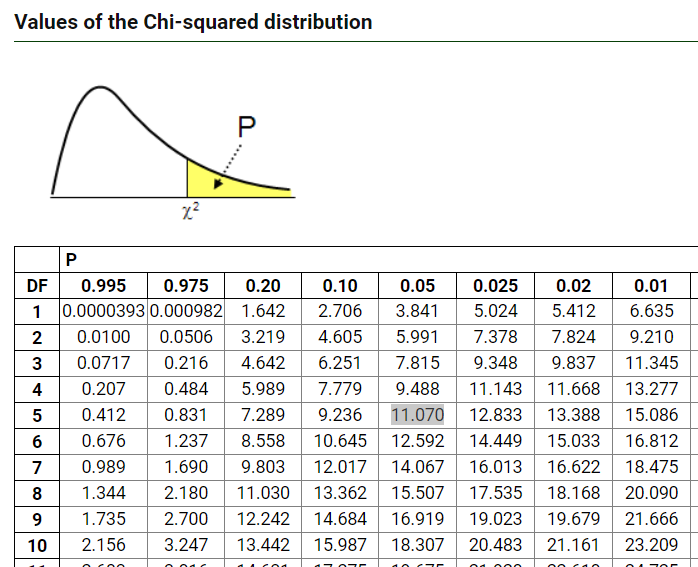

- The cut off for a alpha of 0.05, is 11.070. 
- Our X2 statistic is larger than 11.070.
- Hence we have evidence against the null hypothesis.
- meaning gender type affects working hours

#### Method 2 - The Chi-Squared Test for Independence - Using Scipy

In [21]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[  235,   671,  1287,  1914,  5636,  1028],
       [  223,   575,  1105,  1753, 12700,  5434]], dtype=int64)

In [22]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(2287.190943926107, 0.0, 5)

- The results were exactly the same as our calculations with Numpy. 
- The X2 = ~2287, p-value = ~0 and degrees of freedom = 5.

#### Conclusions
- With a p-value < 0.05 , we can reject the null hypothesis. 
- There is definitely some sort of relationship between 'sex' and the 'hours-per-week' column. 
- We don't know what this relationship is, but we do know that these two variables are not independent of each other.